In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import os 

In [2]:
snapshots = os.listdir('data/VideoData/')
path = os.path.join(
        os.curdir,
        'data', 'VideoData',
        snapshots[0])
N = len(snapshots)
Y = pd.read_csv(path, delimiter=' ', header=None).values
X = np.zeros((Y.shape[0], Y.shape[1], N))
Xstd = np.zeros(shape=X.shape)
X[:,:,0] = Y


for i, snapshot in enumerate(snapshots[1:], start=1):
    path = os.path.join(
        os.curdir,
        'data', 'VideoData',
        snapshot)
    X[:,:,i] = pd.read_csv(path, delimiter=' ', header=None).values

In [3]:
sc = StandardScaler(with_std=False)
pca = PCA(svd_solver='full')
C = np.zeros((3,3,N))
S = np.zeros((N, 3))
for i in range(N):
    Xstd_ = sc.fit_transform(X[:,:,i])
    pca.fit(Xstd_)
    Xstd[:,:,i] = Xstd_
    C[:,:,i] = pca.components_
    _,S[i,:],_ = np.linalg.svd(np.cov(Xstd[:,:,i].T))

In [4]:
def plot_sphere(i, ax,A):
    ax.scatter(A[:,0,i],A[:,1,i],A[:,2,i])

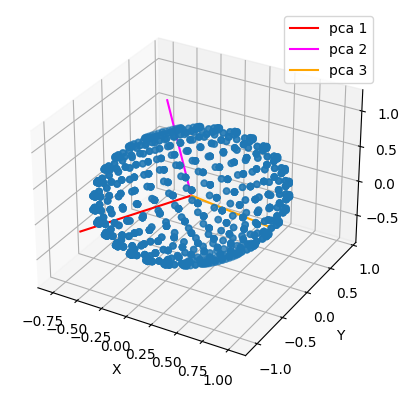

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

l = 1.2
i = 2
ax.plot3D([0,C[0,0,i]*l],[0,C[0,1,i]*l],[0,C[0,2,i]*l], label='pca 1', color='red')
ax.plot3D([0,C[1,0,i]*l],[0,C[1,1,i]*l],[0,C[1,2,i]*l], label='pca 2', color='magenta')
ax.plot3D([0,C[2,0,i]*l],[0,C[2,1,i]*l],[0,C[2,2,i]*l], label='pca 3', color='orange')

plot_sphere(i, ax,Xstd)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

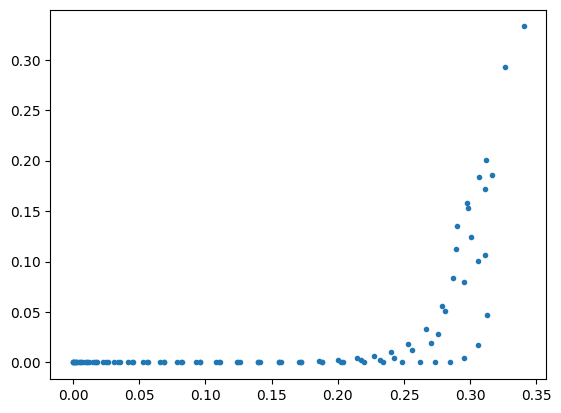

In [9]:
plt.plot(S[:,0], S[:,1], '.')

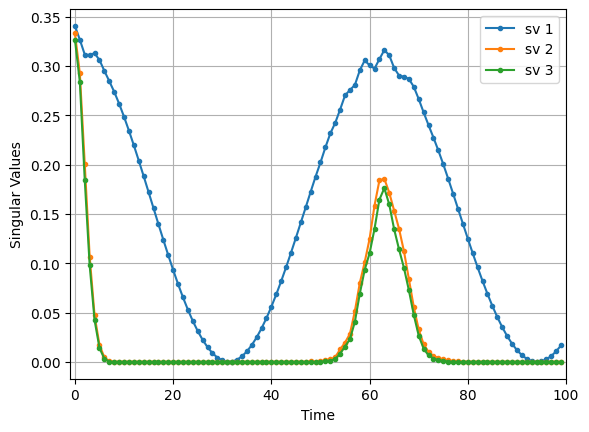

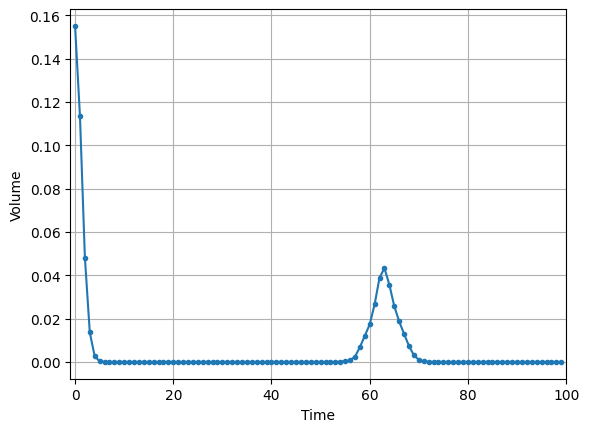

In [6]:
t = np.arange(N)
plt.plot(t,S[:,0],'.-', label='sv 1')
plt.plot(t,S[:,1],'.-', label='sv 2')
plt.plot(t,S[:,2],'.-', label='sv 3')
plt.xlabel('Time')
plt.ylabel('Singular Values')
plt.xlim(-1,N)
plt.legend()
plt.grid()
plt.show()

volume = lambda a,b,c: 4*np.pi/3*a*b*c
volumes = np.array([volume(*s) for s in S])
plt.plot(t, volumes, '.-')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.xlim(-1,N)
plt.grid()
plt.show()

In [7]:
for i, snapshot in enumerate(snapshots):
    path = os.path.join(os.curdir,
        'data', 'PCA',snapshots[i])
    df = pd.DataFrame(C[:, :, i], columns=['X', 'Y', 'Z'], 
                                index=['pca1', 'pca2', 'pca3'])
    df.to_csv(path, sep=' ')